# `XGBoost` 예측모형 자동화

`XGBoost` 예측모형은 뛰어난 성능으로 이미 캐글 등 대다수 경진대회를 휩쓴 검증된 알고리즘이다. 그렇다고 모든 예측문제에 기계학습 알고리즘으로 선택을 할 수는 없다. 우선, 뛰어난 성능을 가진 XGBoost 알고리즘의 마지막까지 높일 수 있는 초모수(Hyper Paramter) 튜닝에 대해서 살펴보자.
[Tianqi Chen (Oct. 22 2014), "Introduction to Boosted Trees", Washington University](https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)

<img src="fig/xgboost-python.png" alt="XGBoost" width="77%" />

## 초모수(Hypter parameter) 튜닝

XGBoost와 관련된 Hypter Parameter는 다음 세가지 범주로 나뉜다.  XGBoost가 의사결정나무에 기반하기 때문에 관련된 모수와 기계학습과 관련이 있기 때문에 이와 연관된 다수 초모수가 포함된다.

- 학습 초모수
    - `objective` [기본설정값=reg:linear]: 지도학습 손실 최소화 함수를 정의
        - `binary:logistic`: 이항 분류 문제 로직스틱 회귀모형으로 반환값이 클래스가 아니라 예측 확률.
        - `multi:softmax`: 다항 분류 문제의 경우 소프트맥스(Softmax)를 사용해서 분류하는데 반횐되는 값이 예측확률이 아니라 클래스임. 또한 `num_class`도 지정해야함.
        - `multi:softprob`: 각 클래스 범주에 속하는 예측확률을 반환함.
    - `eval_metric`: 설정한 `objective`별로 기본설정값이 지정되어 있음.
        - rmse: root mean square error
        - mae: mean absolute error
        - logloss: negative log-likelihood
        - error: Binary classification error rate (0.5 threshold)
        - merror: Multiclass classification error rate
        - mlogloss: Multiclass logloss
        - auc: Area under the curve
    - `seed` [기본설정값: 0]: 재현가능하도록 난수를 고정시킴.
- 일반 초모수
    - booster: 의사결정 기반 모형(`gbtree`), 선형 모형(`linear`)
    - mthread: 병렬처리에 사용되는 코어수, 특정값을 지정하지 않는 경우 자동으로 시스템 코어수를 탐지하여 병렬처리에 동원함.
- 부스팅 초모수
    - `eta` [기본설정값: 0.3]: GBM에 학습율과 유사하고 일반적으로 0.01 ~ 0.2 값이 사용됨
    - `min_child_weight` [기본설정값: 1]: 과적합(overfitting)을 방지할 목적으로 사용되는데, 너무 높은 값은 과소적합(underfitting)을 야기하기 때문에 CV를 사용해서 적절한 값이 제시되어야 한다.
    - `max_depth` [기본설정값: 6]: 과적합 방지를 위해서 사용되는데 역시 CV를 사용해서 적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용된다.
    - `max_leaf_nodes`: `max_leaf_nodes` 값이 설정되면 `max_depth`는 무시된다. 따라서 두값 중 하나를 사용한다.
    - `max_delta_step` [기본설정값: 0]: 일반적으로 잘 사용되지 않음.
    - `subsample` [기본설정값: 1]: 개별 의사결정나무 모형에 사용되는 임의 표본수를 지정. 보통 0.5 ~ 1 사용됨.
    - `colsample_bytree` [기본설정값: 1]: 개별 의사결정나무 모형에 사용될 변수갯수를 지정. 보통 0.5 ~ 1 사용됨.
    - `colsample_bylevel` [기본설정값: 1]: `subsample`, `colsample_bytree` 두 초모수 설정을 통해서 이미 의사결정나무 모형 개발에 사용될 변수갯수와 관측점 갯수를 사용했는데 추가로 `colsample_bylevel`을 지정하는 것이 특별한 의미를 갖는지 의문이 듦.
    - `lambda` [기본설정값: 1]: 능선 회쉬(Ridge Regression)의 L2 정규화(regularization) 초모수. 그다지 많이 사용되고 있지는 않음.
    - `alpha` [기본설정값: 0]: 라쏘 회귀(Lasso Regression)의 L1 정규화(regularization) 초모수로 차원이 높은 경우 알고리즘 속도를 높일 수 있음.
    - `scale_pos_weight` [기본설정값: 1]: 클래스 불균형이 심한 경우 0보다 큰 값을 지정하여 효과를 볼 수 있음.


참고문헌: [Analytics Vidhya, "Complete Guide to Parameter Tuning in XGBoost with codes in Python"](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)


# XGBoost 초모수

XGBoost 초모수(Hyper Parameter)는 XGBoost 객체를 하나 생성한 후에 `print()` 함수로 확인이 가능하다. 그렇다고 모든 Hyper parameter가 중요한 것은 아니다. 

In [25]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

print(xgb_clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## XGBoost 초모수 헬로월드

XGBoost 초모수를 간단한 헬로월드 코드를 작성해본다.

In [26]:
# 경고 출력하지 않음 -----------
import warnings
warnings.filterwarnings('ignore')

# 라이브러리와 데이터 가져오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import sklearn
from sklearn.metrics import classification_report, accuracy_score

print('sklearn version: %s' % sklearn.__version__)
print('xgboost version: %s' % xgb.__version__)

hr_df = pd.read_csv("data/HR_comma_sep.csv")
hr_df.head()

# 시험/훈련 데이터 관측점 구분
colnames = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years']

X, y = hr_df[colnames], hr_df[['left']]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=777)

# XGBoost 예측모형
xgb_model = xgb.XGBClassifier(silent=False, 
                              booster='gbtree',
                              scale_pos_weight=1,
                              learning_rate=0.01,  
                              colsample_bytree = 0.4,
                              subsample = 0.8,
                              objective='binary:logistic', 
                              n_estimators=100, 
                              max_depth=4, 
                              gamma=10, 
                              seed=777)

hr_pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, hr_pred))

sklearn version: 0.21.2
xgboost version: 0.90
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3440
           1       0.99      0.68      0.80      1060

    accuracy                           0.92      4500
   macro avg       0.95      0.84      0.88      4500
weighted avg       0.93      0.92      0.92      4500



## 초모수 1개 대상 예측모형 구축

`max_depth` 의사결정나무 모형 깊이 초모수를 달리해서 XGBoost 예측모형의 성능을 비교해본다.

In [27]:
accuracy_list = []

max_depth_list = [3,5,7,9,10]

for max_depth in max_depth_list:
    xgb_model = xgb.XGBClassifier(max_depth=max_depth, seed=777)
    xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred) 
    accuracy_list.append(xgb_accuracy)
    
xgb_df = pd.DataFrame({'tree depth':max_depth_list, 'accuracy':accuracy_list})
xgb_df.head()    

,tree depth,accuracy
0,3,0.974889
1,5,0.979333
2,7,0.982222
3,9,0.983556
4,10,0.984889


## 교차검증(CV, Cross-Validation)

강건한 예측모형 구축을 위해서 훈련데이터를 교차검증(Cross-Validation)을 통해서 과적합을 방지시킬 수 있는 모형을 구축할 수 있다. 즉 훈련데이터를 3조각, 5조각 혹은 10조각을 내서 1조각을 제외한 나머지 조각을 훈련에 사용하고 모형성능을 1조각으로 평가시켜 가장 강건한 모형을 예측모형으로 선정한다.

In [28]:
hr_dmatrix = xgb.DMatrix(data=hr_df[colnames], label=hr_df[['left']])

cv_params = {"objective":"binary:logistic", 
             "n_estimators": 100, 
             "max_depth":5}

hr_cv = xgb.cv(dtrain=hr_dmatrix, 
               params=cv_params, 
               nfold=5, 
               num_boost_round=10, 
               metrics="auc", 
               as_pandas=True)

hr_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.976151,0.000584,0.974546,0.004580
1,0.980073,0.001645,0.977836,0.003115
2,0.982462,0.000626,0.980670,0.002991
3,0.982992,0.000624,0.981325,0.002830
4,0.984424,0.001160,0.982618,0.002191
5,0.985397,0.000821,0.983066,0.002788
6,0.986158,0.000351,0.984041,0.002888
7,0.987001,0.000325,0.984812,0.002570
8,0.987493,0.000397,0.985092,0.002536
9,0.987849,0.000569,0.985406,0.002380


## 시각화

XGBoost 모형을 시각화함으로써 개발한 예측모형의 성능에 대해 더 깊은 이해를 가질 수 있다. `xgb.plot_importance()` 메쏘드에 XGBoost 모형객체를 넣어 변수중요도를 파악할 수 있다. 특히 의사결정나무 시각화를 위해서 `graphviz` 라이브러리 설치가 필요한데... 경로명 설정문제도 함께 해결하는 방식으로 아래와 같이 `pip install`, `conda install` 명령어를 연이어 실행시킨다.

- `pip install graphviz`
- `conda install graphviz`

참고자료: [frhyme.code, "graphviz 다시 설치하기"](https://frhyme.github.io/python-lib/graphviz_reinstall/)

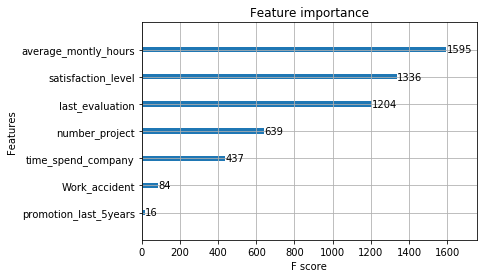

In [29]:
xgb.plot_importance(xgb_model)

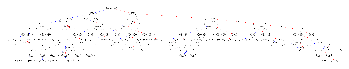

In [30]:
xgb.plot_tree(xgb_model, num_trees=3)

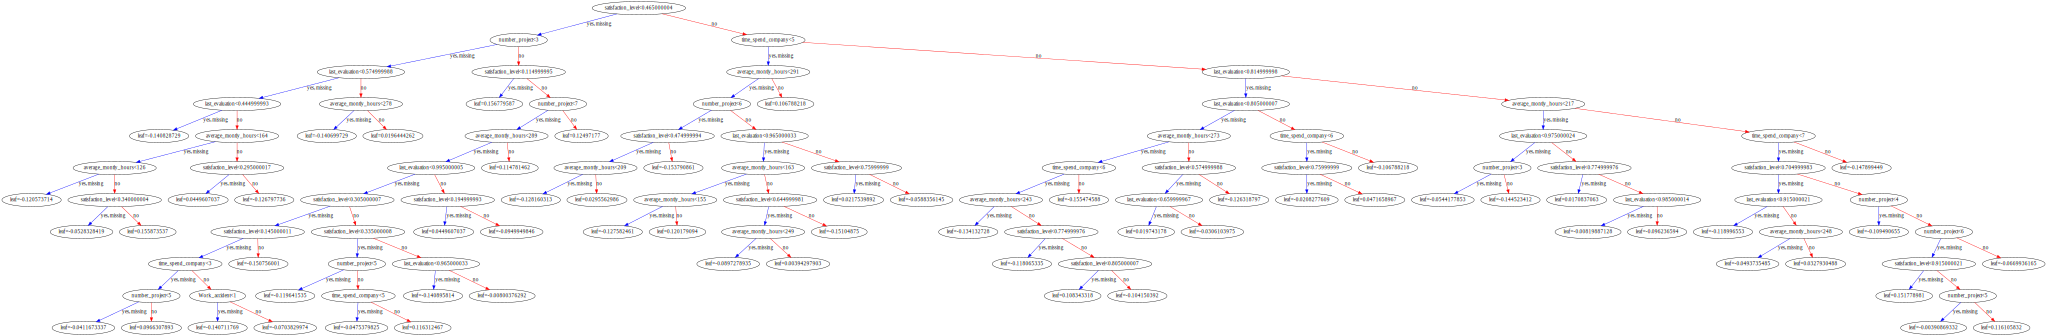

In [31]:
xgb.to_graphviz(xgb_model, num_trees=3)

# 3가지 초모수 튜닝

일반적으로 초모수(Hypter Parameter)를 튜닝하는 방식은 격자 탐색(Grid Search), 임의 탐색(Random Search), 베이즈 최적화(Bayesian Optimization) 방식이 많이 사용된다. 가장 기본적인 격자 탐색을 이해하고 이를 바탕으로 실무에서는 베이즈 최적화를 사용하도록 하자. 

## `for` 루프를 사용한 튜닝

모수가 하나 혹은 두개인 경우 `for` 루플 사용해서 최적 초모수를 결정할 수 있다.

In [54]:
hr_accuracy_list = []

max_depth_list = [1,3,5,7,9]

def hr_grid_search(max_depth): 
    xgb_model = xgb.XGBClassifier(max_depth=max_depth)
    xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
    
    return([max_depth, accuracy_score(y_test, xgb_pred)])
      

for max_depth in max_depth_list:
    hr_accuracy_list.append(hr_grid_search(max_depth))

    
hr_xgb_df = pd.DataFrame(hr_accuracy_list, columns=['tree depth', 'accuracy'])
hr_xgb_df.head()    

,tree depth,accuracy
0,1,0.910000
1,3,0.974889
2,5,0.979333
3,7,0.982222
4,9,0.983556


탐색할 초모수 숫자가 늘어나게 되면 `for` 루프를 계속해서 중첩시켜야 한다. 이는 가독성도 떨어뜨리고 추후 유지보수에 상당한 문제를 야기시킨다.

In [53]:
hr2_accuracy_list = []

max_depth_list = [3,5,7]
subsample_list = [0.6, 0.8, 1.0]

def hr2_grid_search(max_depth, subsample): 
    xgb_model = xgb.XGBClassifier(max_depth=max_depth,
                              subsample=subsample)
    xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
    
    return([max_depth, subsample, accuracy_score(y_test, xgb_pred)])
      

for max_depth in max_depth_list:
    for subsample in subsample_list:
        hr2_accuracy_list.append(hr2_grid_search(max_depth, subsample))
    
hr2_xgb_df = pd.DataFrame(hr2_accuracy_list, columns=['tree depth', 'subsample rate', 'accuracy'])
hr2_xgb_df.head() 

,tree depth,subsample rate,accuracy
0,3,0.6,0.974667
1,3,0.8,0.975111
2,3,1.0,0.974889
3,5,0.6,0.978667
4,5,0.8,0.979333


## 격자 탐색(Grid Search)

`for` 문을 대신하여 격자 탐색(Grid Search)를 사용해서 깔끔하게 코드를 정리해보자. 먼저 분류모형(estimator)를 `XGBoost`로 지정하고 `XGBoost` 모형의 초모수를 딕셔너리로 지정하여 초모수 격자를 생성시킨다.

In [46]:
from sklearn.model_selection import GridSearchCV

# XGBoost 분류기 생성
xgb_clf = xgb.XGBClassifier()

# 초모수 격자생성
xgb_param_grid = {'max_depth': [3,5,7], 
              'subsample': [0.6, 0.8, 1.0]}

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=8,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

hr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=8,
             param_grid={'max_depth': [3, 5, 7], 'subsample': [0.6, 0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sc

격자 탐색이 완료되면 이를 데이터프레임으로 바꾸어서 모수에 대한 사항을 살펴보고 최적 초모수를 감별한다.

In [55]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

,mean_test_score,params
0,0.987299,"{'max_depth': 3, 'subsample': 0.6}"
1,0.987182,"{'max_depth': 3, 'subsample': 0.8}"
2,0.987056,"{'max_depth': 3, 'subsample': 1.0}"
3,0.991230,"{'max_depth': 5, 'subsample': 0.6}"
4,0.991056,"{'max_depth': 5, 'subsample': 0.8}"
5,0.990975,"{'max_depth': 5, 'subsample': 1.0}"
6,0.991625,"{'max_depth': 7, 'subsample': 0.6}"
7,0.991856,"{'max_depth': 7, 'subsample': 0.8}"
8,0.992205,"{'max_depth': 7, 'subsample': 1.0}"


In [51]:
hr_grid_df[hr_grid_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,1.19059,0.064597,0.01707,0.001057,7,1,"{'max_depth': 7, 'subsample': 1.0}",0.993105,0.988505,0.991156,...,0.992205,0.003073,1,0.998429,0.99838,0.998318,0.998676,0.997867,0.998334,0.000263


격자탐색으로 나온 산출물을 정리해보자.

In [71]:
## 최고성능
best_score = hr_grid.best_score_
# 최고성능을 내는 행을 찾아냄
best_row = hr_grid.best_index_

# 최적 초모수: max_depth, subsample
best_max_depth     = hr_grid.best_params_["max_depth"]
best_max_subsample = hr_grid.best_params_["subsample"]

nl = '\n'
print(f'예측모형성능(AUC):  \t {best_score:.3f}{nl}\
        인덱스:           \t {best_row}{nl}\
        max_depth:      \t {max_depth}{nl}\
        subsample:      \t {subsample}')

예측모형성능(AUC):  	 0.992
        인덱스:           	 8
        max_depth:      	 9
        subsample:      	 1.0


## 임의 탐색(Random Search)

임의 탐색(Random Search)은 격자탐색과 여러가지로 유사성이 있으나 임의 추출하는 초모수 탐색횟수를 지정한다는 면에서 차이가 난다.

In [80]:
from sklearn.model_selection import RandomizedSearchCV

# XGBoost 분류기 생성
xgb_clf = xgb.XGBClassifier()

# 초모수 격자생성
xgb_param_grid = {'max_depth': list(range(2,10)), 
                  'subsample': np.linspace(0.4, 1, 7)}

# Create a random search object
xgb_random = RandomizedSearchCV(estimator = xgb_clf,
                                param_distributions = xgb_param_grid,
                                n_iter = 10,
                                scoring='roc_auc', 
                                n_jobs=8, 
                                cv = 3, 
                                refit=True, 
                                return_train_score = True)

# Fit to the training data
xgb_random.fit(X_train, y_train)



RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [81]:
hr_random_df = pd.DataFrame(xgb_random.cv_results_)
hr_random_df.loc[:, ['mean_test_score', "params"]]

,mean_test_score,params
0,0.988994,"{'subsample': 0.4, 'max_depth': 7}"
1,0.990350,"{'subsample': 1.0, 'max_depth': 5}"
2,0.989628,"{'subsample': 0.4, 'max_depth': 9}"
3,0.988970,"{'subsample': 1.0, 'max_depth': 4}"
4,0.990566,"{'subsample': 0.7, 'max_depth': 8}"
5,0.990519,"{'subsample': 0.6, 'max_depth': 8}"
6,0.990126,"{'subsample': 0.6, 'max_depth': 7}"
7,0.990458,"{'subsample': 0.8999999999999999, 'max_depth': 5}"
8,0.989637,"{'subsample': 0.8, 'max_depth': 4}"
9,0.991309,"{'subsample': 0.8999999999999999, 'max_depth': 8}"


## 임의 탐색 기본기(날코딩)

임의 탐색(Random Search)를 `scikit-learn` 라이브러리를 사용해서 `RandomizedSearchCV` 클래스를 동원해서 구현했다. 하지만, 격자탐색 `for` 루프와 마찬가지로 소위 말해서 날코딩으로 구현하는 것도 가능하다. 

1. 탐색하고자 하는 초모수 리스트를 정의한다: `max_depth`, `subsample`
1. `product` 함수로 조합한 리스트를 list comprehension으로 구현한다: 이를 위해서 `itertools` 라이브러리 `product`를 사용한다.
1. `np.random.choice()` 함수로 초모수 조합에서 추출한다.
1. 이를 주어진 탐색횟수만큼 `for` 문을 돌려 예측모형 성능을 데이터화한다.

In [85]:
from itertools import product

# 초모수 정의: max_depth, subsample
max_depth_list = list(range(3,10))
subsample_list = np.linspace(0.1, 1, 10)

# 초모수 조합 리스트 생성
combi_list = [list(x) for x in product(max_depth_list, subsample_list)]

# 초모수 조합에서 난수 추출
random_combi_index = np.random.choice(range(1, len(combi_list)+1), 10, replace=False)
combi_random_selected = [combi_list[x] for x in random_combi_index]

# 난수로 뽑은 조합 출력
print(combi_random_selected)

[[5, 0.5], [8, 0.7000000000000001], [4, 0.30000000000000004], [3, 0.6], [3, 0.30000000000000004], [7, 0.9], [7, 0.7000000000000001], [6, 0.5], [5, 0.2], [5, 0.9]]


In [102]:
hr_random_list = []
# 예측함수 XGBoost 정의
def hr_random_search(max_depth, subsample): 
    xgb_model = xgb.XGBClassifier(max_depth=max_depth,
                              subsample=subsample)
    xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
    
    return([max_depth, subsample, accuracy_score(y_test, xgb_pred)])
      

for i, param in enumerate(combi_random_selected):
    hr_random_list.append(hr_random_search(param[0], param[1]))

    
hr_xgb_random_df = pd.DataFrame(hr_random_list, columns=['tree depth', 'subsample rate', 'accuracy'])
hr_xgb_random_df

,tree depth,subsample rate,accuracy
0,5,0.5,0.979333
1,8,0.7,0.983556
2,4,0.3,0.976444
3,3,0.6,0.974667
4,3,0.3,0.974667
5,7,0.9,0.982889
6,7,0.7,0.981333
7,6,0.5,0.979556
8,5,0.2,0.976667
9,5,0.9,0.979111


## 베이즈 최적화
 [Hyperopt: Distributed Asynchronous Hyper-parameter Optimization](https://github.com/hyperopt/hyperopt) 웹사이트에서 개발버전을 다운로드 받는 것도 가능하고, `!pip install hyperopt` 명령어를 통해서 베이지안 최적화 라이브러리를 설치한다.
 
 참고: [District Data Labs (Dec 24, 2017), "Parameter Tuning with Hyperopt"](https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce)

In [107]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score

# 초모수 탐색공간 정의
param_space = {'max_depth': hp.quniform('max_depth', 2, 10, 1),
               'subsample': hp.uniform('subsample', 0.1, 0.9)}

# 목적함수 정의
def objective(params):
    params = {'max_depth': int(params['max_depth']),
              'subsample': params['subsample']}
    xgb_clf = xgb.XGBClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(xgb_clf, X_train, y_train, 
                                 scoring='accuracy', 
                                 cv=5, 
                                 n_jobs=8).mean()
    loss = 1 - best_score
    return loss

# 알고리즘 실행
best = fmin(fn=objective, space=param_space, 
            max_evals=10, 
            rstate=np.random.RandomState(777), 
            algo=tpe.suggest)
print(best)

100%|██████████| 20/20 [00:21<00:00,  1.12it/s, best loss: 0.01581120386605428]
{'max_depth': 9.0, 'subsample': 0.6383870484708831}


상기 코드를 이해가 전에 먼저 간단한 예제를 통해서 베이즈 최적화기법에 대한 이해를 넓혀가자. $y=(x-1)^2$ 함수에 대한 최소값을 찾아내는 문제를 베이즈 최적화를 통해 살펴보자. 먼저 `fmin()` 함수에 `fn`에 $y=(x-1)^2$ 함수를 지정한다. 그리고 나서 검색공간에 `hp.uniform()`을 지정하면 베이즈 최적화를 통해 최소값을 찾아낼 수 있다.

In [135]:
best = fmin(
    fn=lambda x: (x-1)**2,
    space=hp.uniform('x', -2, 4),
    algo=tpe.suggest,
    max_evals=100)

print(best)

100%|██████████| 100/100 [00:00<00:00, 580.14it/s, best loss: 5.613681768014516e-06]
{'x': 1.0023693209508242}


상기 내용을 `matplotlib`으로 시각화하면 다음과 같다.

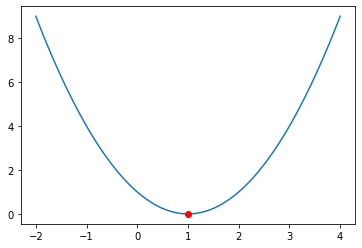

In [127]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(np.linspace(-2,4,100))
y = (x-1) ** 2

plt.plot(x,y)
plt.plot(best['x'], 0, 'ro')
plt.show()

## 초모수 시각화

초모수 값에 따라 예측모형의 성능변화를 시각화하는 것은 초모수 탐색공간을 줄일 수 있을 뿐만 아니라 최적 초모수 탐색에 큰 도움을 준다.

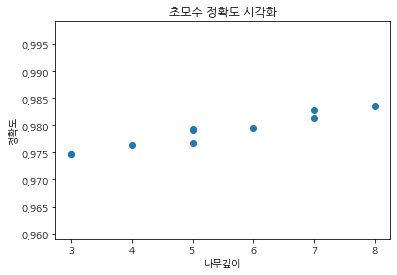

In [140]:
%matplotlib inline 
plt.rc('font', family='NanumGothicOTF') # 한글 폰트깨짐 해결(맥) 윈도우는 NanumGothic

plt.scatter(y=hr_xgb_random_df.accuracy, x=hr_xgb_random_df['tree depth'])  
plt.gca().set(xlabel='나무깊이', ylabel='정확도', title='초모수 정확도 시각화')
plt.show()